In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
# 가장 빈번하게 사용되는 단어의 개수
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)

In [3]:
# 데이터를 동일한 길이로 맞추기
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

# 길이를 맞추기 위해 pad_sequences() 함수 사용
# 데이터가 지정해준 길이(max_len)보다 짧은 경우 0으로 채워넣으며 긴 경우는 잘라낸다.
pad_x_train = pad_sequences(x_train, maxlen = max_len)
pad_x_test = pad_sequences(x_test, maxlen = max_len)

## 학습을 위한 층 쌓기

- return_sequences: 불리언. 아웃풋 시퀀스의 마지막 아웃풋을 반환할 지, 혹은 시퀀스 전체를 반환할지 여부
    - SimpleRNN층을 여러 개 사용하기 위해서는 return_sequence 인자를 사용해야 한다.
    - 이는 이전 상태의 연결을 위해 전체 상태 시퀀스를 반환하는 것이다.
- dropout: 0과 1 사이 부동소수점. 인풋의 선형적 변형을 실행하는데 드롭시킬(고려하지 않을) 유닛의 비율
- recurrent_dropout: 0과 1 사이 부동소수점. 순환 상태의 선형적 변형을 실행하는데 드롭시킬(고려하지 않을) 유닛의 비율
- 케라스가 제공하는 모든 순환 층에는 드롭아웃 사용을 위한 dropout과 recurrent_dropout 인자가 존재한다.
- 이를 사용하면 컨볼루션 신경망에서 사용한 것과 같이 별도의 Dropout층을 추가하지 않아도, 드롭아웃 방식을 적용할 수 있다.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 32))     # 32개의 결과값

model.add(SimpleRNN(32, return_sequences = True, dropout = 0.15, recurrent_dropout = 0.15))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 324,193
Trainable params: 324,193
Non-trainable params: 0
_________________________________________________________________


## 모델 학습하기

In [7]:
hist = model.fit(pad_x_train, y_train, batch_size = 32, epochs = 15, validation_split = 0.2)

# 학습 결과로 리턴된 history에서 확인할 수 있는 지표 출력
print(hist.history.keys())

Epoch 1/15
625/625 [==============================] - 118s 189ms/step - loss: 0.6974 - acc: 0.5253 - val_loss: 0.6733 - val_acc: 0.5712
Epoch 2/15
625/625 [==============================] - 110s 176ms/step - loss: 0.5778 - acc: 0.6901 - val_loss: 0.8603 - val_acc: 0.5770
Epoch 3/15
625/625 [==============================] - 113s 181ms/step - loss: 0.4796 - acc: 0.7790 - val_loss: 0.5952 - val_acc: 0.7068
Epoch 4/15
625/625 [==============================] - 109s 175ms/step - loss: 0.4293 - acc: 0.8135 - val_loss: 0.4526 - val_acc: 0.8058
Epoch 5/15
625/625 [==============================] - 112s 179ms/step - loss: 0.4613 - acc: 0.7871 - val_loss: 0.5023 - val_acc: 0.7782
Epoch 6/15
625/625 [==============================] - 110s 175ms/step - loss: 0.3825 - acc: 0.8369 - val_loss: 0.4586 - val_acc: 0.7986
Epoch 7/15
625/625 [==============================] - 110s 176ms/step - loss: 0.3524 - acc: 0.8526 - val_loss: 0.5057 - val_acc: 0.7658
Epoch 8/15
625/625 [============================

## 모델 평가하기

In [8]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 36s 46ms/step - loss: 0.6003 - acc: 0.7442


[0.6002552509307861, 0.7442399859428406]

## 학습 과정 그리기

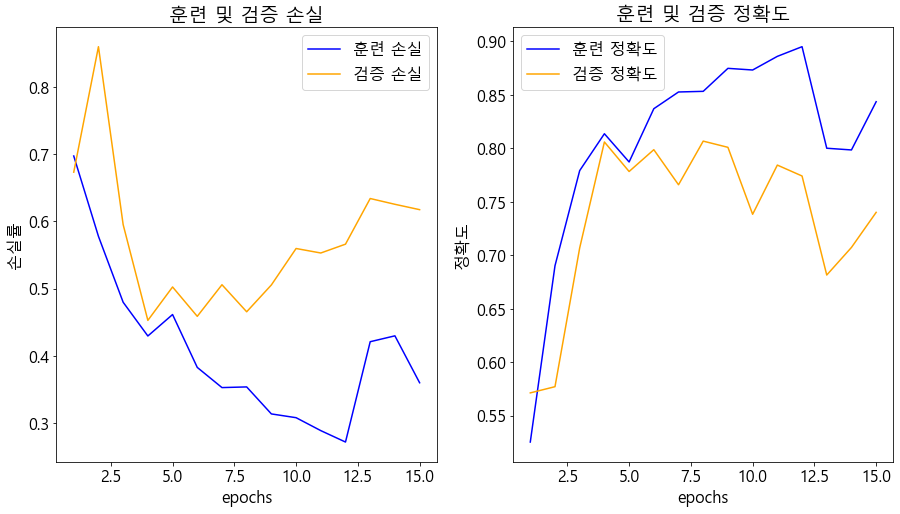

In [12]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (15, 8)

his_dict = hist.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure()

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = '훈련 손실')
ax1.plot(epochs, val_loss, color = 'orange', label = '검증 손실')
ax1.set_title('훈련 및 검증 손실')
ax1.set_xlabel('epochs')
ax1.set_ylabel('손실률')
ax1.legend()

# 훈련 및 검증 정확도 그리기
acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = '훈련 정확도')
ax2.plot(epochs, val_acc, color = 'orange', label = '검증 정확도')
ax2.set_title('훈련 및 검증 정확도')
ax2.set_xlabel('epochs')
ax2.set_ylabel('정확도')
ax2.legend()

plt.show()

- 결과는 Embedding층만 사용하여 구성한 모델보다 낮은 것을 볼 수 있다.

- SimpleRNN층은 Dense층과 같이 기능적ㅇ로 매우 단순하게 구성되어 있기 때문에 깊이 쌓을수록 학슾에 큰 문제가 존재한다.
    - 앞부분에 존재하는 몇 개의 시점은 기억할 수 있지만, 시점이 흐를수록 지속해서 기억하지 못함.
    - 그래디언트 손실문제

- 그러므로 영화리뷰와 같이 긴 문장의 데이터를 처리하기에는 적합하지 않다. 대부분의 실제 환경에서 SimpleRNN층의 사용을 선호하지 않는다.